In [1]:
from architecture import build_unet
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify, unpatchify
import tifffile as tiff
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from entryGiver import EntryGiver

dataset = EntryGiver()

image_stack, mask_stack, test = dataset.getTable()

large_image_stack, large_mask_stack = image_stack, mask_stack

In [2]:
'''
for img in image_stack:
    new_img = cv2.resize(img, (1024, 768))
    large_image_stack.append(new_img)
large_image_stack = np.asarray(large_image_stack)

for img in mask_stack:
    new_img = cv2.resize(img, (1024, 768))
    large_mask_stack.append(new_img)
large_mask_stack = np.asarray(large_mask_stack)
print(large_image_stack.shape, large_mask_stack.shape)
'''


'\nfor img in image_stack:\n    new_img = cv2.resize(img, (1024, 768))\n    large_image_stack.append(new_img)\nlarge_image_stack = np.asarray(large_image_stack)\n\nfor img in mask_stack:\n    new_img = cv2.resize(img, (1024, 768))\n    large_mask_stack.append(new_img)\nlarge_mask_stack = np.asarray(large_mask_stack)\nprint(large_image_stack.shape, large_mask_stack.shape)\n'

In [6]:

all_img_patches = []
for img in range(large_image_stack.shape[0]):
    #print(img)     #just stop here to see all file names printed
     
    large_image = large_image_stack[img]
    
    patches_img = patchify(large_image, (256, 256), step=256)  #Step=256 for 256 patches means no overlap
    

    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            
            single_patch_img = patches_img[i,j,:,:]
            single_patch_img = (single_patch_img.astype('float32')) / 255.
            #scaler = MinMaxScaler()
            #single_patch_img= scaler.fit_transform(single_patch_img)
            
            all_img_patches.append(single_patch_img)

#This will split the image into small images of shape [3,3]
images = np.array(all_img_patches)
images = np.expand_dims(images, -1)

all_mask_patches = []
for img in range(large_mask_stack.shape[0]):
    #print(img)     #just stop here to see all file names printed
     
    large_mask = large_mask_stack[img]
    
    patches_mask = patchify(large_mask, (256, 256), step=256)  #Step=256 for 256 patches means no overlap
    

    for i in range(patches_mask.shape[0]):
        for j in range(patches_mask.shape[1]):
            
            single_patch_mask = patches_mask[i,j,:,:]
            single_patch_mask = single_patch_mask / 255.
            
            all_mask_patches.append(single_patch_mask)

#This will split the image into small images of shape [3,3]
masks = np.array(all_mask_patches)
masks = np.expand_dims(masks, -1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size = 0.25, random_state = 0)
masks = np.array(all_mask_patches)
masks = np.expand_dims(masks, -1)

X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size = 0.25, random_state = 0)
'''
new_images = []
for img in large_image_stack:
    new_images.append(np.divide(img, [[255. for i in range(320)] for j in range(240)]))


images = np.array(new_images)
images = np.expand_dims(new_images, -1)

masks = np.array(large_mask_stack)
masks = np.expand_dims(masks, -1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size = 0.25, random_state = 0)
print(images.shape)
print(masks.shape)
'''

ValueError: `window_shape` is too large

In [4]:
print(images.shape)
print(masks.shape)
for i in images[0]:
    print(max(i) if max(i) >0 else "")

(10, 240, 320, 1)
(10, 240, 320, 1)
[0.4627451]
[0.4627451]
[0.4627451]
[0.4627451]
[0.4627451]
[0.46666667]
[0.4627451]
[0.47058824]
[0.47058824]
[0.4627451]
[0.4627451]
[0.45882353]
[0.47058824]
[0.4627451]
[0.4627451]
[0.46666667]
[0.47843137]
[0.47843137]
[0.4745098]
[0.46666667]
[0.45882353]
[0.45882353]
[0.45882353]
[0.4627451]
[0.45490196]
[0.45882353]
[0.45882353]
[0.4627451]
[0.45882353]
[0.45882353]
[0.45882353]
[0.4627451]
[0.45882353]
[0.4627451]
[0.45490196]
[0.45490196]
[0.45882353]
[0.46666667]
[0.4627451]
[0.45882353]
[0.45490196]
[0.45490196]
[0.45490196]
[0.45882353]
[0.45882353]
[0.45882353]
[0.45882353]
[0.47058824]
[0.45490196]
[0.44705882]
[0.45882353]
[0.45098039]
[0.44705882]
[0.45490196]
[0.45098039]
[0.45098039]
[0.45490196]
[0.45098039]
[0.44705882]
[0.44705882]
[0.45490196]
[0.44313725]
[0.44705882]
[0.44705882]
[0.44705882]
[0.43921569]
[0.44313725]
[0.44313725]
[0.44313725]
[0.43921569]
[0.44313725]
[0.44705882]
[0.44313725]
[0.44705882]
[0.44705882]
[0.43

ValueError: cannot reshape array of size 76800 into shape (240,240)

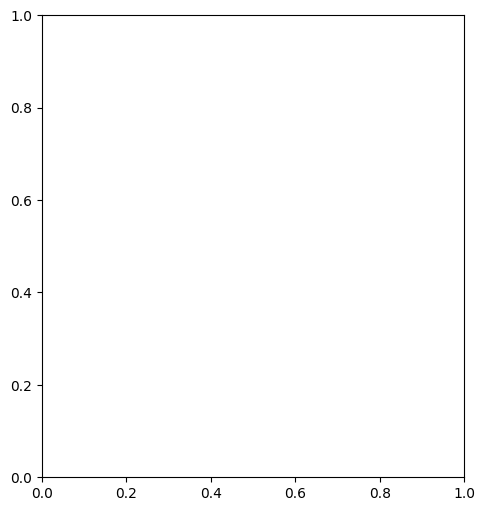

In [5]:
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (240, 240)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (240, 240)), cmap='gray')
plt.show()



IMG_HEIGHT = images.shape[1]
IMG_WIDTH  = images.shape[2]
IMG_CHANNELS = images.shape[3]


input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = build_unet(input_shape)
model.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


#New generator with rotation and shear where interpolation that comes with rotation and shear are thresholded in masks. 
#This gives a binary mask rather than a mask with interpolated values. 
seed=24
from keras.preprocessing.image import ImageDataGenerator

img_data_gen_args = dict(rotation_range=0,
                     width_shift_range=0,
                     height_shift_range=0,
                     shear_range=0,
                     zoom_range=0,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

mask_data_gen_args = dict(rotation_range=0,
                     width_shift_range=0,
                     height_shift_range=0,
                     shear_range=0,
                     zoom_range=0,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect',
                     preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype)) #Binarize the output again. 

image_data_generator = ImageDataGenerator(**img_data_gen_args)
#image_data_generator.fit(X_train, augment=True, seed=seed)

batch_size= 8

image_generator = image_data_generator.flow(X_train, seed=seed, batch_size=batch_size)
valid_img_generator = image_data_generator.flow(X_test, seed=seed, batch_size=batch_size) #Default batch size 32, if not specified here

mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
#mask_data_generator.fit(y_train, augment=True, seed=seed)
mask_generator = mask_data_generator.flow(y_train, seed=seed, batch_size=batch_size)
valid_mask_generator = mask_data_generator.flow(y_test, seed=seed, batch_size=batch_size)  #Default batch size 32, if not specified here

def my_image_mask_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

my_generator = my_image_mask_generator(image_generator, mask_generator)

validation_datagen = my_image_mask_generator(valid_img_generator, valid_mask_generator)


x = image_generator.next()
y = mask_generator.next()
for i in range(0,1):
    image = x[i]
    mask = y[i]
    plt.subplot(1,2,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0])
    plt.show()


steps_per_epoch = 3*(len(X_train))//batch_size


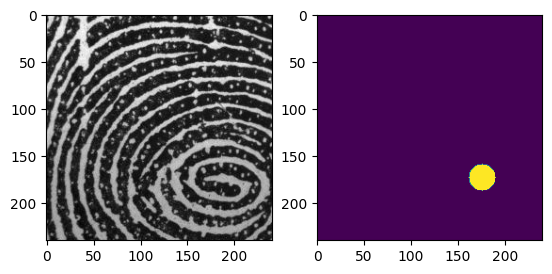

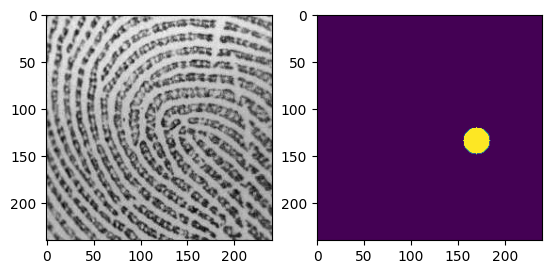

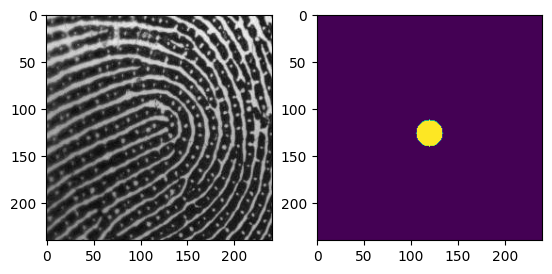

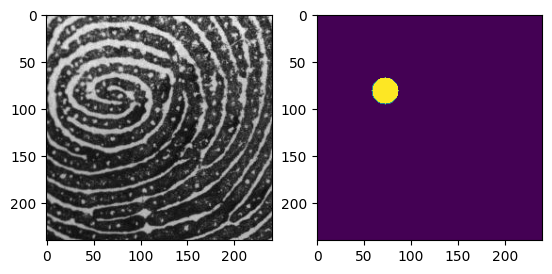

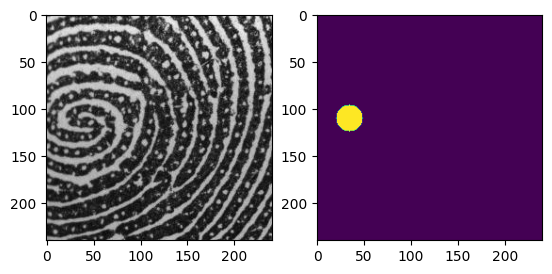

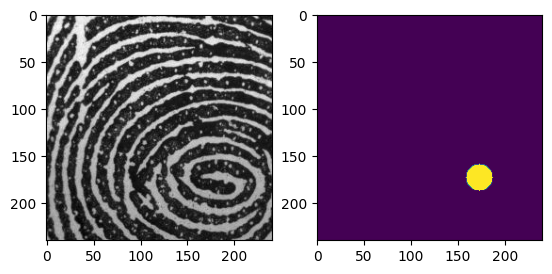

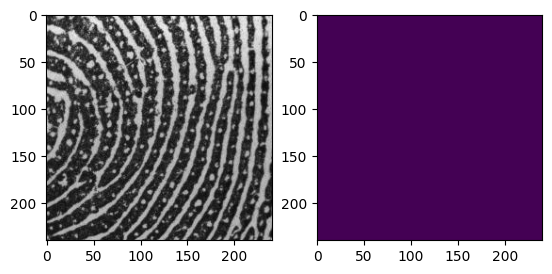

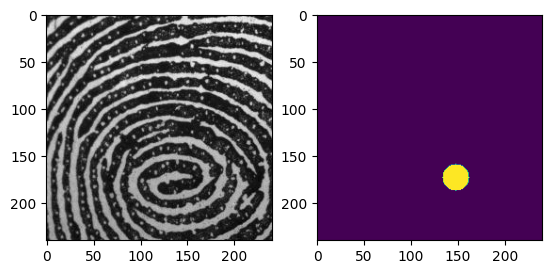

In [ ]:
for image, mask in zip(x, y):
    plt.subplot(1,2,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0])
    plt.show()

In [ ]:

history = model.fit_generator(my_generator, validation_data=validation_datagen, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_steps=steps_per_epoch, epochs=10)
model.save(r"C:\Users\arsal\Desktop\NewML\borrowedArc\SavedModel")

C:\Users\arsal\AppData\Local\Temp\ipykernel_20424\2574105045.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(my_generator, validation_data=validation_datagen,


Epoch 1/10
5/5 [==============================] - 90s 14s/step - loss: 0.6538 - accuracy: 0.6932 - val_loss: 0.6774 - val_accuracy: 0.9314
Epoch 2/10
5/5 [==============================] - 68s 14s/step - loss: 0.3634 - accuracy: 0.9749 - val_loss: 2.4353 - val_accuracy: 0.0221
Epoch 3/10
5/5 [==============================] - 63s 13s/step - loss: 0.2168 - accuracy: 0.9898 - val_loss: 38.9761 - val_accuracy: 0.0153
Epoch 4/10
5/5 [==============================] - 62s 13s/step - loss: 0.1711 - accuracy: 0.9901 - val_loss: 1256.8302 - val_accuracy: 0.0210
Epoch 5/10
5/5 [==============================] - 63s 13s/step - loss: 0.1461 - accuracy: 0.9904 - val_loss: 1386.5787 - val_accuracy: 0.0211
Epoch 6/10
5/5 [==============================] - 65s 13s/step - loss: 0.1312 - accuracy: 0.9904 - val_loss: 2786.0540 - val_accuracy: 0.0236
Epoch 7/10
5/5 [==============================] - 70s 15s/step - loss: 0.1191 - accuracy: 0.9904 - val_loss: 2203.3076 - val_accuracy: 0.0273
Epoch 8/10
5/5

INFO:tensorflow:Assets written to: C:\Users\arsal\Desktop\NewML\borrowedArc\SavedModel\assets


INFO:tensorflow:Assets written to: C:\Users\arsal\Desktop\NewML\borrowedArc\SavedModel\assets


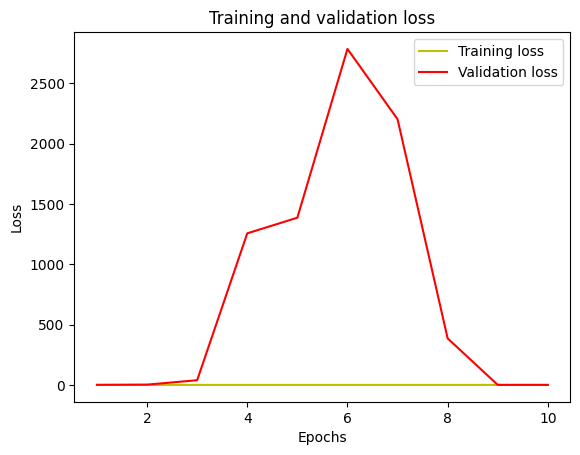

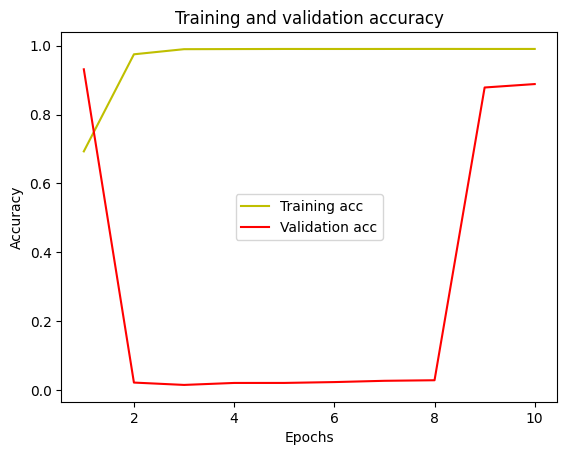

1/1 [==============================] - 2s 2s/step
IoU socre is:  0.017750752410785577
1/1 [==============================] - 0s 376ms/step


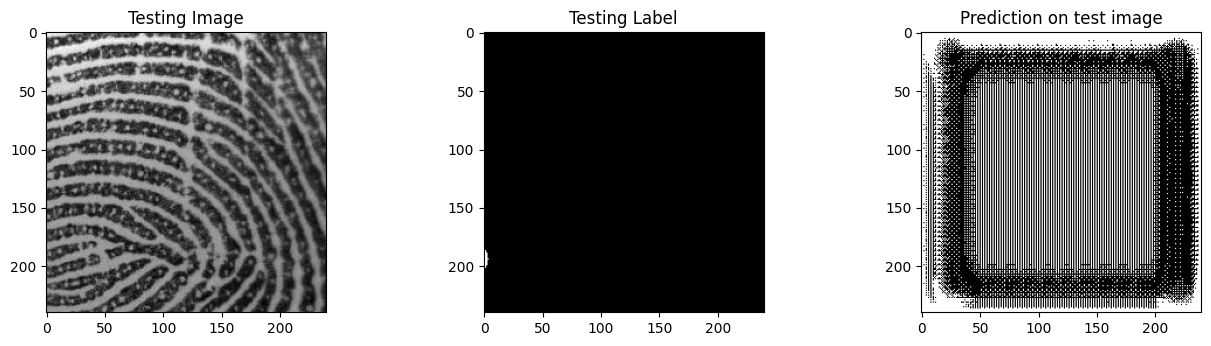

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']t
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

#Predict on a few images
#model = get_model()
#model.load_weights('mitochondria_50_plus_100_epochs.hdf5') #Trained for 50 epochs and then additional 100
#model.load_weights('mitochondria_gpu_tf1.4.hdf5')  #Trained for 50 epochs

test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

1/1 [==============================] - 6s 6s/step
IoU socre is:  0.008703165391624952
1/1 [==============================] - 1s 1s/step


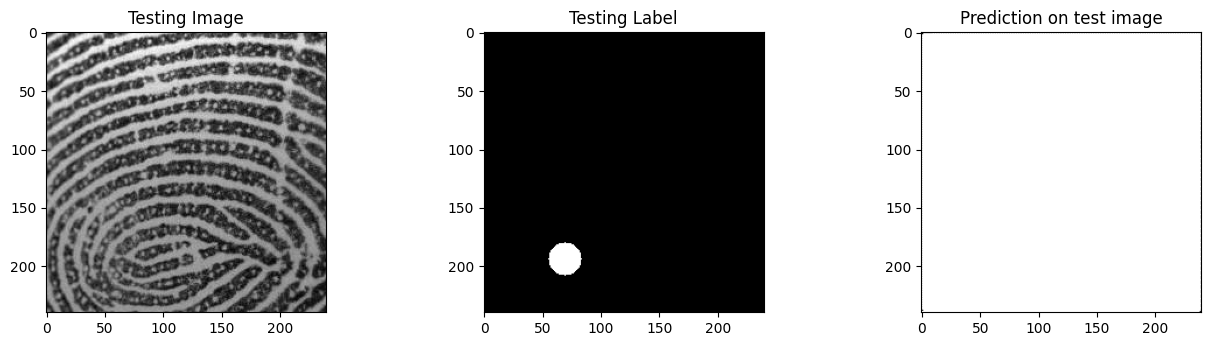

1/1 [==============================] - 1s 1s/step


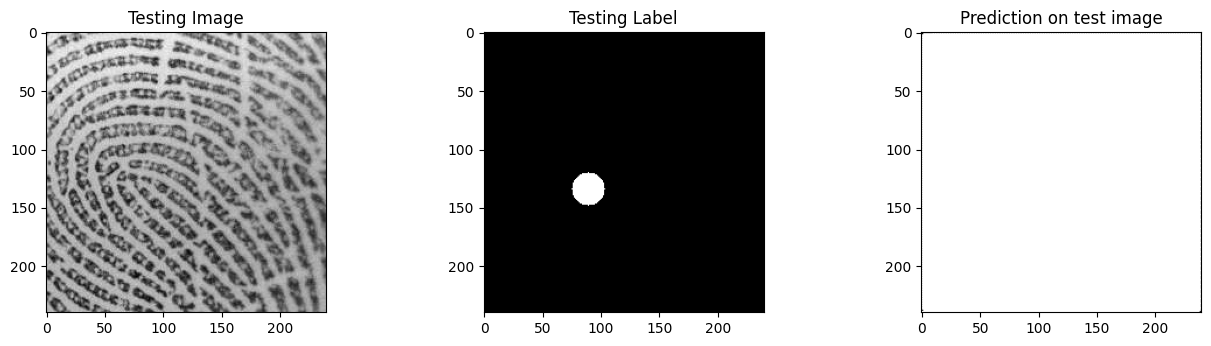

1/1 [==============================] - 1s 1s/step


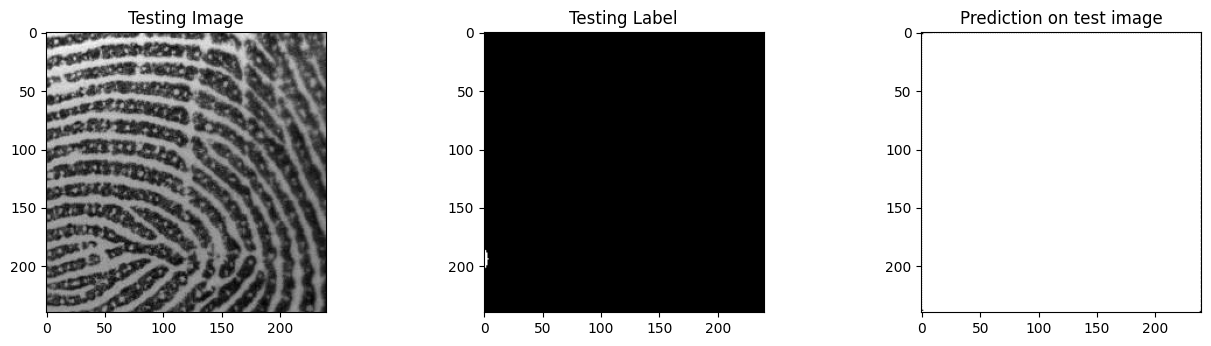

1/1 [==============================] - 1s 1s/step


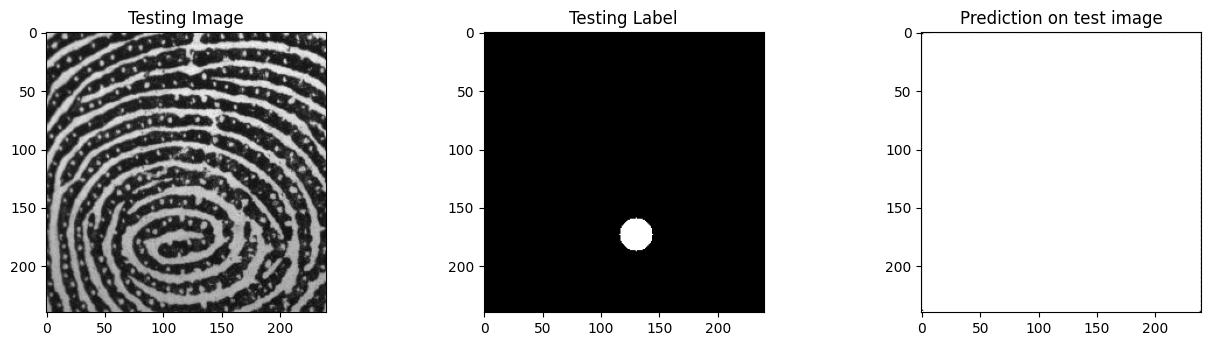

1/1 [==============================] - 1s 1s/step


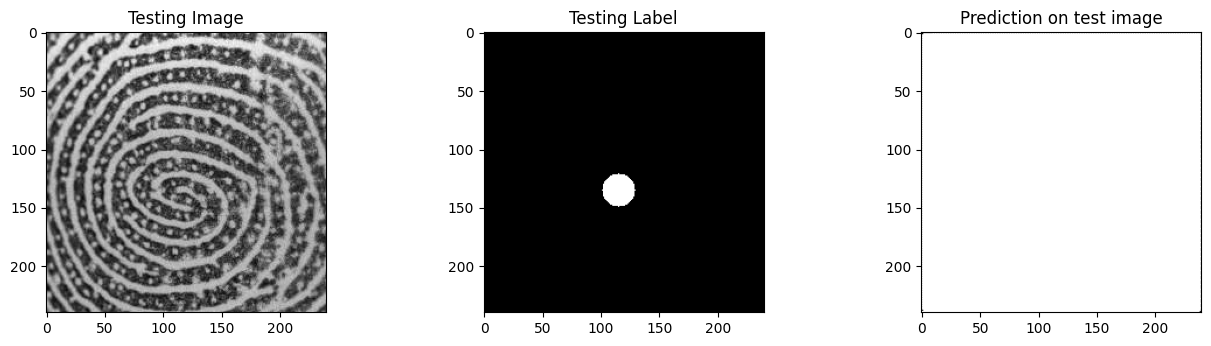

In [ ]:
from tensorflow import keras
model = keras.models.load_model(r"C:\Users\arsal\Desktop\NewML\borrowedArc\SavedModel")

#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

#Predict on a few images
#model = get_model()
#model.load_weights('mitochondria_50_plus_100_epochs.hdf5') #Trained for 50 epochs and then additional 100
#model.load_weights('mitochondria_gpu_tf1.4.hdf5')  #Trained for 50 epochs
for test_img, ground_truth in zip(X_test, y_test):
    test_img_norm=test_img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img_norm, 0)
    prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(test_img[:,:,0], cmap='gray')
    plt.subplot(232)
    plt.title('Testing Label')
    plt.imshow(ground_truth[:,:,0], cmap='gray')
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(prediction, cmap='gray')

    plt.show()

In [ ]:
for i in prediction:
    for j in i:
        if(j != 0):
            print(j)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
